<a href="https://colab.research.google.com/github/Shikha23K/ML-Algorithm_-Continue-/blob/main/SMSspamNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import nltk 


Download nltk packages , here I m downloading 'stopwords' then quit

In [ ]:
nltk.download_shell()


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> x

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


Load file into google drive then mount to the particular directory in google drive

In [3]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


 and open with path from content to file name

In [4]:
sms=[line for line in open("/content/gdrive/My Drive/Colab Notebook/smsspamcollection/SMSSpamCollection")]


In [7]:
len(sms), type(sms)

(5574, list)

Read 2nd message into sms file

In [9]:
sms[2]


"spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n"

In [13]:
import pandas as pd
df=pd.read_csv("/content/gdrive/My Drive/Colab Notebook/smsspamcollection/SMSSpamCollection",sep='\t',
               names=['target','SMS'])
df.head()



,target,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5574 non-null   object
 1   SMS     5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [15]:
df.describe()

,target,SMS
count,5574,5574
unique,2,5171
top,ham,"Sorry, I'll call later"
freq,4827,30


Grouping ham and spam messages

In [16]:
df.groupby('target').describe()

SMS                                                               
       count unique                                                top freq
target                                                                     
ham     4827   4518                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

Feature Engineering: using domain knowledge of data to create features that make machine learning algorithm work


In [18]:
df['length']=df['SMS'].apply(len)

Adding one column named 'length'

In [19]:
df.head()

,target,SMS,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Data Visualisation

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


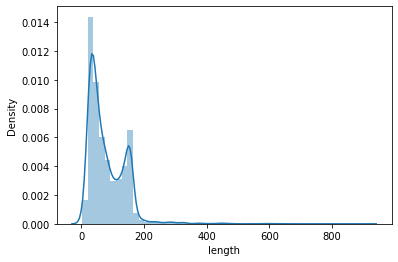

In [22]:
sns.distplot(df['length'])